In [44]:
import os

import matplotlib.pyplot as plt
import pandas as pd

from util.eval_utils import concat_path, get_project_root_directory
from util.utils import generate_timestamp_for_filename

# Security Level Adaptation Times UC-2

In [25]:

# Adjusted directory path

directory_path = concat_path(get_project_root_directory(), 'eval', 'raw', 'sec-level-adaptations-uc-2', 'cleaned')

df = pd.DataFrame()
df_temp = pd.DataFrame()

# Iterate through all files in the directory
for file_name in os.listdir(directory_path):

    if file_name.endswith(".csv"):  # Ensure we're processing csv files

        file_path = concat_path(directory_path, file_name)

        # Extract the identifier from the filename (last number before "_tta_eval")
        identifier = file_name.replace('.csv', '')

        df_temp = pd.read_csv(file_path, index_col=0)

        df_temp = df_temp.replace(',', '.', regex=True)
        df_temp = df_temp.astype(float)

        # Prefix columns with the filename identifier
        df_temp.columns = [f"{identifier}_{col}" for col in df_temp.columns]

        # Append the temporary DataFrame to the main DataFrame
        df = pd.concat([df, df_temp], axis=1)

df





,CEO#1_Zeit gesamt,CEO#1_Server bearbeitung,Director#3.2_Zeit gesamt,Director#3.2_Server bearbeitung,Director#3.3_Zeit gesamt,Director#3.3_Server bearbeitung,Manager#4.6_Zeit gesamt,Manager#4.6_Server bearbeitung,M_Dir#2.1_Zeit gesamt,M_Dir#2.1_Server bearbeitung
Nr.,,,,,,,,,,
1,754.3178,404.496,389.313,63.334,466.019,111.267,422.434,104.086,517.256,187.737
2,419.2100,389.351,108.396,93.980,155.337,128.089,91.217,84.176,231.791,218.738
3,449.1640,420.258,95.933,65.548,137.274,110.246,123.688,94.711,245.992,218.496
4,449.1098,419.429,121.490,95.572,123.828,109.431,123.555,94.991,232.070,203.592
5,387.9821,373.632,94.251,66.042,124.323,94.777,123.555,81.348,231.690,202.720
6,402.4741,372.885,120.472,94.299,155.152,141.967,137.127,110.538,247.378,218.718
7,434.3020,419.442,124.412,94.335,123.562,94.818,108.625,95.205,215.417,186.386
8,449.7160,433.942,124.050,95.311,108.041,79.015,108.937,79.526,199.567,170.986
9,418.3898,388.148,108.729,78.410,123.546,94.055,124.239,95.642,261.470,232.562


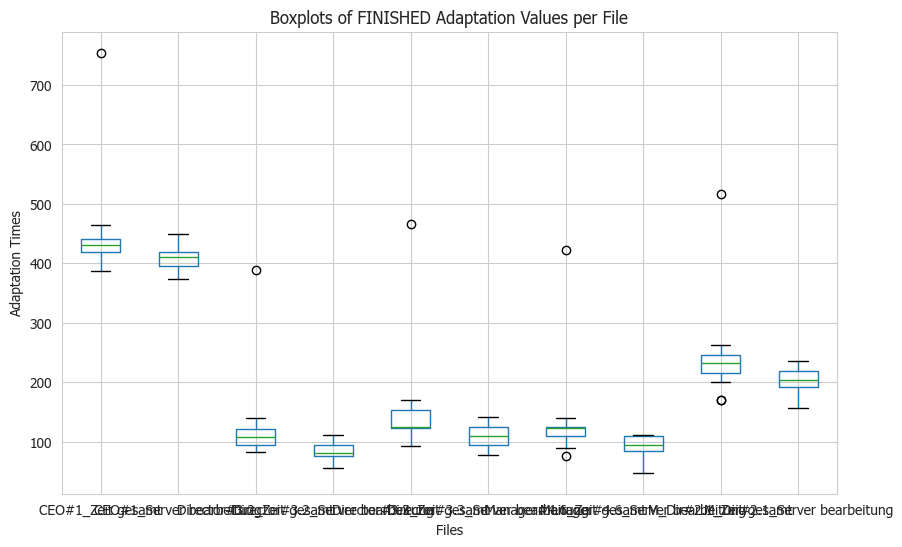

In [26]:
# Create boxplots for each column in the DataFrame
df.boxplot(figsize=(10, 6))

# Add labels and title
plt.title("Boxplots of FINISHED Adaptation Values per File")
plt.ylabel("Adaptation Times")
plt.xlabel("Files")

# Display the plot
plt.show()

In [27]:
# eliminate the outliers

outliers = {
    'CEO#1_Zeit gesamt': [754.3178],
    'Director#3.2_Zeit gesamt': [389.313],
    'Director#3.3_Zeit gesamt': [466.019],
    'M_Dir#2.1_Zeit gesamt': [517.256],
    'Manager#4.6_Zeit gesamt': [422.434]
}

# Loop through each specified column and remove the outliers
for suffix, values in outliers.items():
    column_name = suffix
    if column_name in df.columns:
        df[column_name] = df[column_name][~df[column_name].isin(values)]

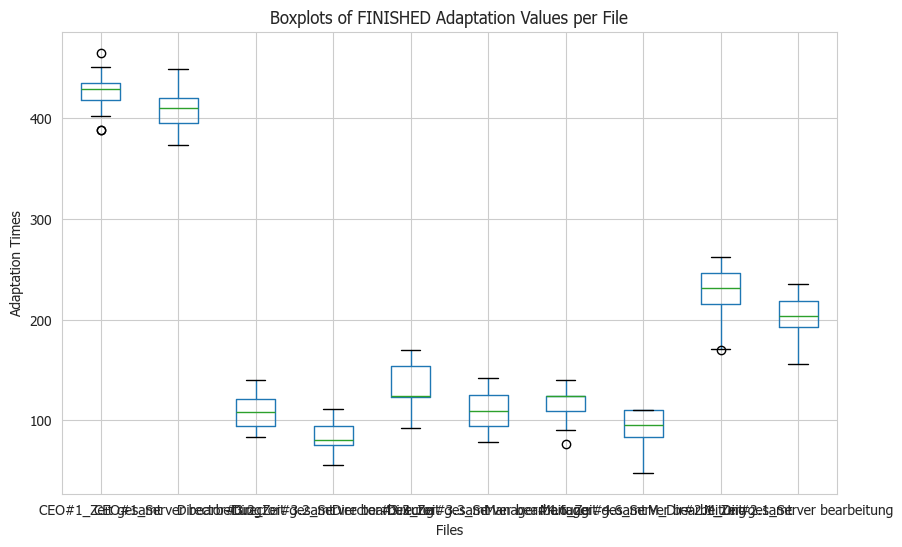

In [28]:
# Create boxplots for each column in the DataFrame
df.boxplot(figsize=(10, 6))

# Add labels and title
plt.title("Boxplots of FINISHED Adaptation Values per File")
plt.ylabel("Adaptation Times")
plt.xlabel("Files")

# Display the plot
plt.show()

In [29]:
# reorder according to tree
desired_order = [
    'CEO#1_Zeit gesamt',
    'CEO#1_Server bearbeitung',
    'M_Dir#2.1_Zeit gesamt',
    'M_Dir#2.1_Server bearbeitung',
    'Director#3.3_Zeit gesamt',
    'Director#3.3_Server bearbeitung',
    'Director#3.2_Zeit gesamt',
    'Director#3.2_Server bearbeitung',
    'Manager#4.6_Zeit gesamt',
    'Manager#4.6_Server bearbeitung'
]

# Reorder the columns in the DataFrame
df = df[desired_order]
df

,CEO#1_Zeit gesamt,CEO#1_Server bearbeitung,M_Dir#2.1_Zeit gesamt,M_Dir#2.1_Server bearbeitung,Director#3.3_Zeit gesamt,Director#3.3_Server bearbeitung,Director#3.2_Zeit gesamt,Director#3.2_Server bearbeitung,Manager#4.6_Zeit gesamt,Manager#4.6_Server bearbeitung
Nr.,,,,,,,,,,
1,NaN,404.496,NaN,187.737,NaN,111.267,NaN,63.334,NaN,104.086
2,419.2100,389.351,231.791,218.738,155.337,128.089,108.396,93.980,91.217,84.176
3,449.1640,420.258,245.992,218.496,137.274,110.246,95.933,65.548,123.688,94.711
4,449.1098,419.429,232.070,203.592,123.828,109.431,121.490,95.572,123.555,94.991
5,387.9821,373.632,231.690,202.720,124.323,94.777,94.251,66.042,123.555,81.348
6,402.4741,372.885,247.378,218.718,155.152,141.967,120.472,94.299,137.127,110.538
7,434.3020,419.442,215.417,186.386,123.562,94.818,124.412,94.335,108.625,95.205
8,449.7160,433.942,199.567,170.986,108.041,79.015,124.050,95.311,108.937,79.526
9,418.3898,388.148,261.470,232.562,123.546,94.055,108.729,78.410,124.239,95.642


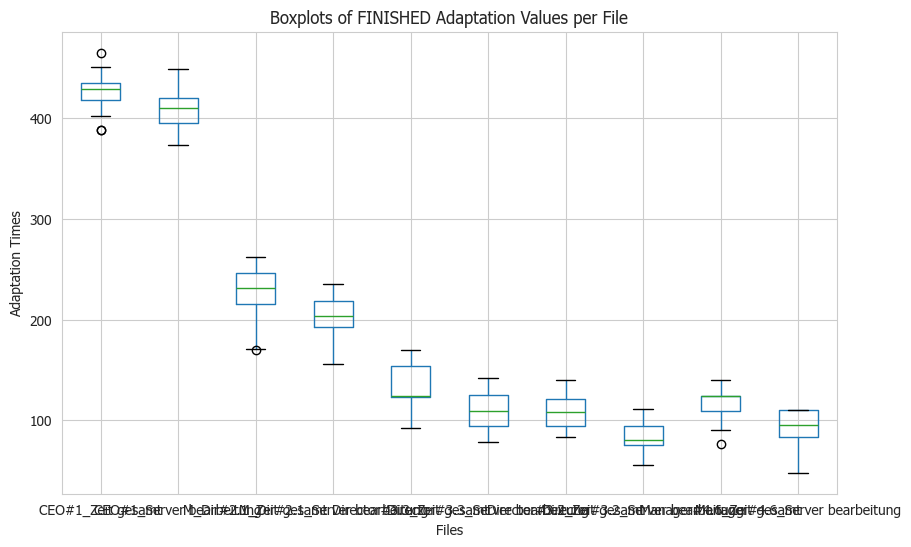

In [30]:
# Create boxplots for each column in the DataFrame
df.boxplot(figsize=(10, 6))

# Add labels and title
plt.title("Boxplots of FINISHED Adaptation Values per File")
plt.ylabel("Adaptation Times")
plt.xlabel("Files")

# Display the plot
plt.show()

In [31]:
# Define a dictionary mapping old column names to new ones
new_column_names = {
    'CEO#1_Zeit gesamt': 'CEO#1_t',
    'CEO#1_Server bearbeitung': 'CEO#1_a',
    'M_Dir#2.1_Zeit gesamt': 'MD#2.1_t',
    'M_Dir#2.1_Server bearbeitung': 'MD#2.1_a',
    'Director#3.3_Zeit gesamt': 'D#3.3_t',
    'Director#3.3_Server bearbeitung': 'D#3.3_a',
    'Director#3.2_Zeit gesamt': 'D#3.2_t',
    'Director#3.2_Server bearbeitung': 'D#3.2_a',
    'Manager#4.6_Zeit gesamt': 'M#4.6_t',
    'Manager#4.6_Server bearbeitung': 'M#4.6_a'
}

# Rename the columns in the DataFrame
df.rename(columns=new_column_names, inplace=True)

In [40]:
df

,CEO#1_t,CEO#1_a,MD#2.1_t,MD#2.1_a,D#3.3_t,D#3.3_a,D#3.2_t,D#3.2_a,M#4.6_t,M#4.6_a
Nr.,,,,,,,,,,
1,NaN,404.496,NaN,187.737,NaN,111.267,NaN,63.334,NaN,104.086
2,419.2100,389.351,231.791,218.738,155.337,128.089,108.396,93.980,91.217,84.176
3,449.1640,420.258,245.992,218.496,137.274,110.246,95.933,65.548,123.688,94.711
4,449.1098,419.429,232.070,203.592,123.828,109.431,121.490,95.572,123.555,94.991
5,387.9821,373.632,231.690,202.720,124.323,94.777,94.251,66.042,123.555,81.348
6,402.4741,372.885,247.378,218.718,155.152,141.967,120.472,94.299,137.127,110.538
7,434.3020,419.442,215.417,186.386,123.562,94.818,124.412,94.335,108.625,95.205
8,449.7160,433.942,199.567,170.986,108.041,79.015,124.050,95.311,108.937,79.526
9,418.3898,388.148,261.470,232.562,123.546,94.055,108.729,78.410,124.239,95.642


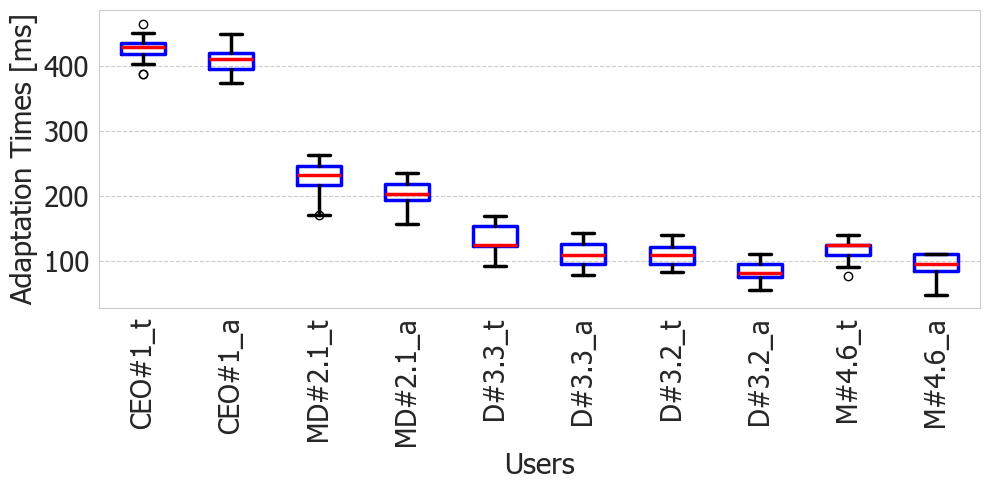

In [37]:


# Copy and rename the DataFrame for plotting
df_plot = df.copy()

# Set a more modern and professional style using seaborn
plt.rc('font', family='Tahoma')

# Create the boxplot
boxplot = df_plot.boxplot(
    figsize=(10, 5),
    grid=False,
    boxprops=dict(color="blue", linewidth=2.5),
    whiskerprops=dict(linewidth=2.5),
    capprops=dict(linewidth=2.5),
    medianprops=dict(color="red", linewidth=2.5))
# boxplot = df_plot.boxplot(figsize=(12, 8), grid=False, 
#     boxprops=dict(color="steelblue", linewidth=2.5),  # Softer blue
#                           whiskerprops=dict(color="skyblue", linewidth=2.5),  # Light sky blue
#                           capprops=dict(color="deepskyblue", linewidth=2.5),  # Deep sky blue for contrast
#                           medianprops=dict(color="coral", linewidth=2.5)  # Warm coral for the median
#                           )

# Customize font sizes
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Adaptation Times [ms]", fontsize=21)
plt.xlabel("Users", fontsize=21)

# Add a subtle grid for the y-axis only
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.tight_layout()

plt.savefig(concat_path(get_project_root_directory(), 'eval', 'out',
                        f'{generate_timestamp_for_filename()}_boxplot_uc_2_sec_lvl_adaptations_v1.pdf'), format='pdf',
            bbox_inches='tight')
plt.show()

In [67]:
# Calculate quartiles, minimum, and maximum for each column
summary_stats = df.describe().T[["min", "25%", "50%", "75%", "max"]]

# Rename columns for clarity
summary_stats.rename(columns={
    "min": "Minimum",
    "25%": "Q1 (25%)",
    "50%": "Median (50%)",
    "75%": "Q3 (75%)",
    "max": "Maximum"
}, inplace=True)

# Print the summary statistics

print(summary_stats)

          Minimum    Q1 (25%)  Median (50%)    Q3 (75%)  Maximum
CEO#1_t   387.937  418.380275      428.9620  434.645525  465.060
CEO#1_a   372.885  394.968500      410.1410  419.591500  449.251
MD#2.1_t  169.791  215.862000      231.6365  246.208750  262.203
MD#2.1_a  156.055  192.730000      203.1210  218.607000  234.919
D#3.3_t    92.227  122.665000      124.4600  153.674250  169.271
D#3.3_a    77.935   94.633000      109.4310  125.123000  141.967
D#3.2_t    83.257   94.279750      108.5605  121.235500  139.480
D#3.2_a    55.523   75.442000       80.5950   94.523000  110.751
M#4.6_t    76.161  108.668750      123.5550  124.215750  139.472
M#4.6_a    47.775   83.638500       94.9860  109.742000  110.575


In [68]:
# Round them for the table in paper
summary_stats = summary_stats.round(3)
print(summary_stats)

          Minimum  Q1 (25%)  Median (50%)  Q3 (75%)  Maximum
CEO#1_t   387.937   418.380       428.962   434.646  465.060
CEO#1_a   372.885   394.968       410.141   419.592  449.251
MD#2.1_t  169.791   215.862       231.636   246.209  262.203
MD#2.1_a  156.055   192.730       203.121   218.607  234.919
D#3.3_t    92.227   122.665       124.460   153.674  169.271
D#3.3_a    77.935    94.633       109.431   125.123  141.967
D#3.2_t    83.257    94.280       108.560   121.236  139.480
D#3.2_a    55.523    75.442        80.595    94.523  110.751
M#4.6_t    76.161   108.669       123.555   124.216  139.472
M#4.6_a    47.775    83.638        94.986   109.742  110.575


<Figure size 1000x600 with 0 Axes>

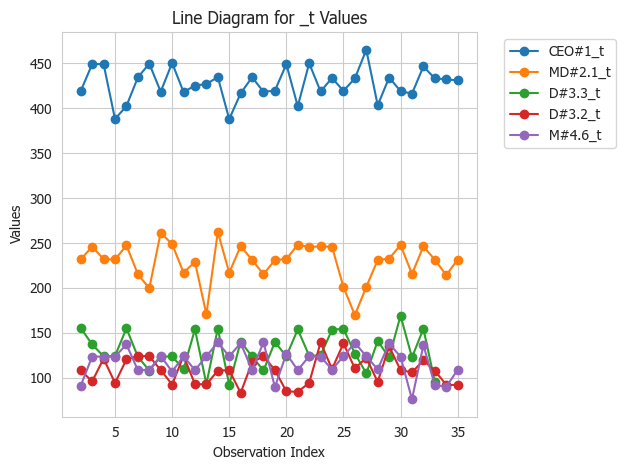

<Figure size 1000x600 with 0 Axes>

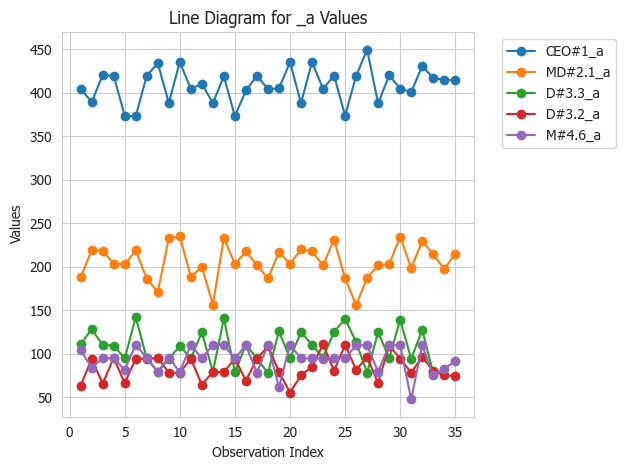

In [47]:

# Filter columns for "_t" and "_a" values
t_values = df.filter(like="_t")
a_values = df.filter(like="_a")

# Plot "_t" values
plt.figure(figsize=(10, 6))
t_values.plot(kind='line', marker='o')
plt.title('Line Diagram for _t Values')
plt.xlabel('Observation Index')
plt.ylabel('Values')
plt.legend(t_values.columns, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot "_a" values
plt.figure(figsize=(10, 6))
a_values.plot(kind='line', marker='o')
plt.title('Line Diagram for _a Values')
plt.xlabel('Observation Index')
plt.ylabel('Values')
plt.legend(a_values.columns, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

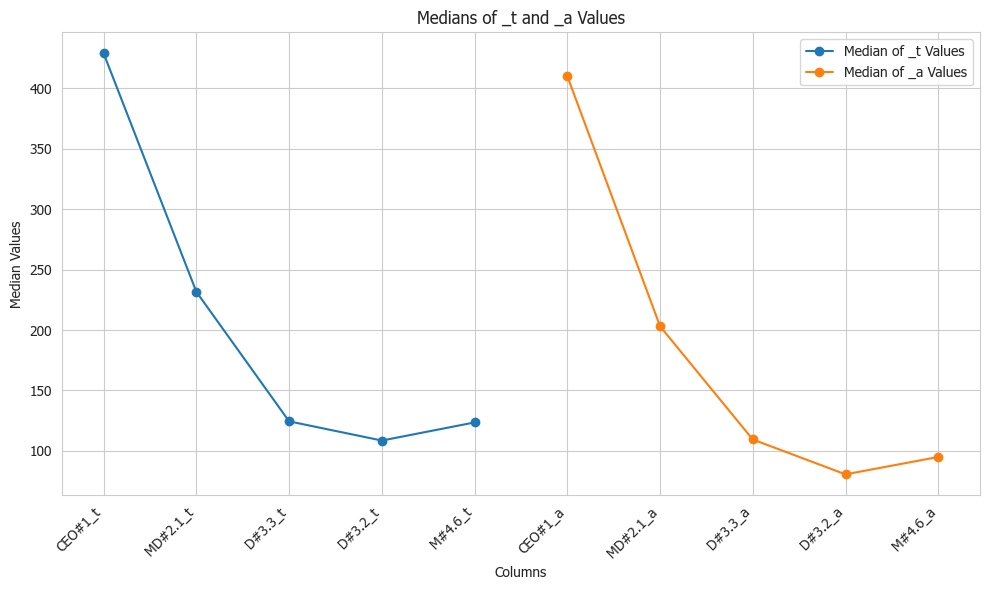

In [48]:
# Calculate medians for columns ending with "_t" and "_a"
t_medians = df.filter(like="_t").median(axis=0)
a_medians = df.filter(like="_a").median(axis=0)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t_medians.index, t_medians.values, marker='o', label='Median of _t Values')
plt.plot(a_medians.index, a_medians.values, marker='o', label='Median of _a Values')

# Customize the plot
plt.title('Medians of _t and _a Values')
plt.xlabel('Columns')
plt.ylabel('Median Values')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

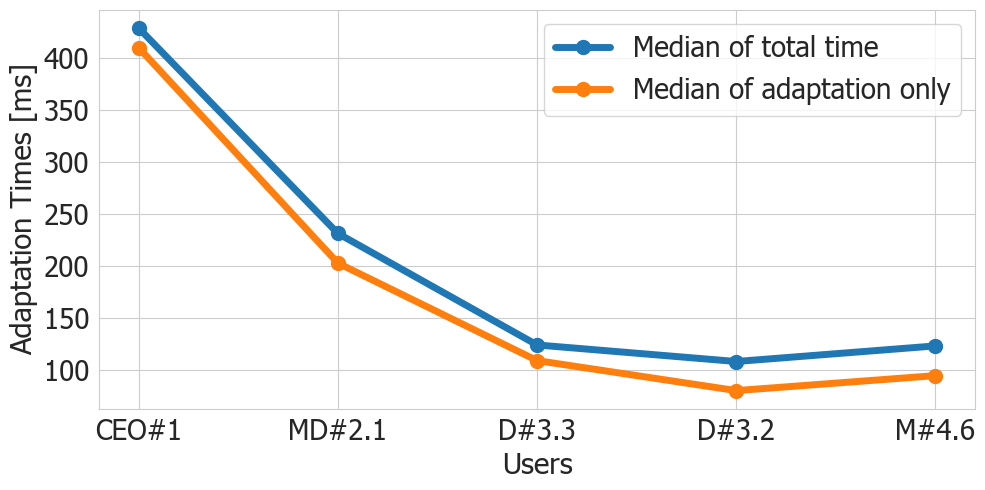

In [65]:
# Extract column prefixes by splitting at '_' and taking the first part
data_grouped = df.rename(columns=lambda x: x.split('_')[0])

# Calculate medians for "_t" and "_a" grouped by prefixes
t_medians = df.filter(like="_t").rename(columns=lambda x: x.split('_')[0]).median()
a_medians = df.filter(like="_a").rename(columns=lambda x: x.split('_')[0]).median()

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(t_medians.index, t_medians.values, marker='o', label='Median of total time', linewidth=5, markersize=10)
plt.plot(a_medians.index, a_medians.values, marker='o', label='Median of adaptation only', linewidth=5, markersize=10)
plt.rc('font', family='Tahoma')

# Customize the plot
plt.xlabel('Users', fontsize=21)
plt.ylabel('Adaptation Times [ms]', fontsize=21)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.savefig(concat_path(get_project_root_directory(), 'eval', 'out',
                        f'{generate_timestamp_for_filename()}_line_diagram_uc_2_sec_lvl_adaptations_v1.pdf'),
            format='pdf', bbox_inches='tight')
plt.show()